[View in Colaboratory](https://colab.research.google.com/github/sungreong/TIL/blob/master/kernel_density.ipynb)

$ $

$$ f(x) = \frac{1}{2} \phi(x-2)+ \frac{1}{2} \phi(x+2)$$

In [0]:

def gaussian(x,b=1):
    return np.exp(-x**2/(2*b**2))/(b*np.sqrt(2*np.pi))

def epane(x , b = 1 ) :
    d= []
    for i in x :
        if -1 < i < 1 :
            a  = 3/4*((1-i**2)/b)
            d = np.append(d ,a )
        else :
            d = np.append(d, 0)
    return d 


def higher_order( l , x ,  b = 1 , name = "None") :
    print(name  , " high-order  " , l , "bandwith : " , b ) 
    order = int( l / 2)-1
    if name == "Gaussian" :
        aa = gaussian(x,b = b )[:,0]
        for _ in np.arange(order) :
            aa = 2*aa - np.convolve(aa , aa , "same")
    elif name =="Epanechnikov" :
        aa = epane(x, b = b )
        for _ in np.arange(order) :
            aa = 2*aa - np.convolve(aa , aa , "same")    
    return aa
        
    

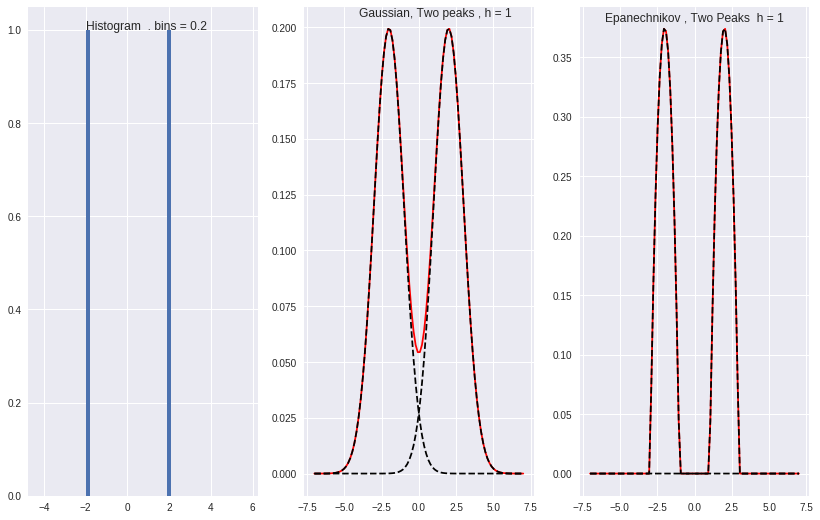

In [24]:
import matplotlib.pyplot as plt
#Let's take any value
X=np.array([-2.0, 2.0])

# Plot all available kernels
X_plot = np.linspace(-7, 7, 100)[:, None]
fig = plt.figure( figsize = (14, 9))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


bins = np.linspace( -5 ,5 , 50 )
ax1.hist(X[:] , bins = bins+ 0.75 )
ax1.text(-2 , 1.0 , "Histogram  . bins = 0.2 ")
ax2.plot( X_plot , (gaussian(X_plot-X[0])+gaussian(X_plot-X[1]))/2 , "r" )
ax2.text( -4 , 0.205, "Gaussian, Two peaks , h = 1 ")
ax2.plot(X_plot, (gaussian(X_plot-X[0]))/2, '-k', linestyle="dashed")
ax2.plot(X_plot, (gaussian(X_plot-X[1]))/2, '-k', linestyle="dashed")
ax3.plot( X_plot , (epane(X_plot - X[0]) + epane( X_plot - X[1])) /2 , "r" )
ax3.text( -6 , 0.38 , "Epanechnikov , Two Peaks  h = 1  ")
ax3.plot( X_plot , epane(X_plot - X[0])/2 , '-k', linestyle="dashed" )
ax3.plot( X_plot , epane(X_plot - X[1])/2 , '-k', linestyle="dashed")


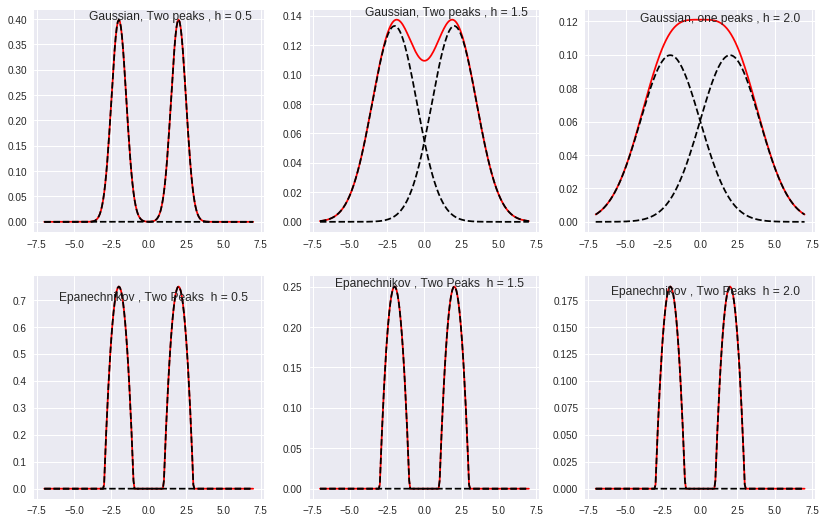

In [25]:
#Let's take any value
X=np.array([-2.0, 2.0])

# Plot all available kernels
X_plot = np.linspace(-7, 7, 200)[:, None]
fig = plt.figure( figsize = (14, 9))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)


ax1.plot( X_plot , (gaussian(X_plot-X[0] , b = 0.5 )+gaussian(X_plot-X[1] , b = 0.5 ))/2 , "r" )
ax1.text( -4 , 0.4, "Gaussian, Two peaks , h = 0.5 ")
ax1.plot(X_plot, (gaussian(X_plot-X[0], b = 0.5 ))/2, '-k', linestyle="dashed")
ax1.plot(X_plot, (gaussian(X_plot-X[1], b = 0.5 ))/2, '-k', linestyle="dashed")
ax2.plot( X_plot , (gaussian(X_plot-X[0], b = 1.5 )+gaussian(X_plot-X[1] , b = 1.5))/2 , "r" )
ax2.text( -4 , 0.14, "Gaussian, Two peaks , h = 1.5 ")
ax2.plot(X_plot, (gaussian(X_plot-X[0], b = 1.5))/2, '-k', linestyle="dashed")
ax2.plot(X_plot, (gaussian(X_plot-X[1], b = 1.5))/2, '-k', linestyle="dashed")
ax3.plot( X_plot , (gaussian(X_plot-X[0], b = 2.0 )+gaussian(X_plot-X[1], b = 2.0 ))/2 , "r" )
ax3.text( -4 , 0.12, "Gaussian, one peaks , h = 2.0 ")
ax3.plot(X_plot, (gaussian(X_plot-X[0], b = 2.0 ))/2, '-k', linestyle="dashed")
ax3.plot(X_plot, (gaussian(X_plot-X[1], b = 2.0 ))/2, '-k', linestyle="dashed")



ax4.plot( X_plot , (epane(X_plot - X[0], b = 0.5) + epane( X_plot - X[1], b = 0.5)) /2 , "r")
ax4.text( -6 , 0.7  , "Epanechnikov , Two Peaks  h = 0.5  ")
ax4.plot( X_plot , epane(X_plot - X[0], b = 0.5)/2  ,'-k', linestyle="dashed")
ax4.plot( X_plot , epane(X_plot - X[1], b = 0.5)/2  ,'-k', linestyle="dashed")
ax5.plot( X_plot , (epane(X_plot - X[0], b = 1.5) + epane( X_plot - X[1], b = 1.5)) /2 , "r")
ax5.text( -6 , 0.25 , "Epanechnikov , Two Peaks  h = 1.5 ")
ax5.plot( X_plot , epane(X_plot - X[0], b = 1.5)/2  , '-k', linestyle="dashed")
ax5.plot( X_plot , epane(X_plot - X[1], b = 1.5)/2  , '-k', linestyle="dashed")
ax6.plot( X_plot , (epane(X_plot - X[0], b = 2.0 ) + epane( X_plot - X[1], b = 2.0 )) /2 , "r")
ax6.text( -6 , 0.18 , "Epanechnikov , Two Peaks  h = 2.0  ")
ax6.plot( X_plot , epane(X_plot - X[0], b = 2.0 )/2  ,'-k', linestyle="dashed")
ax6.plot( X_plot , epane(X_plot - X[1], b = 2.0 )/2  ,'-k', linestyle="dashed")


Gaussian  high-order   4 bandwith :  0.5
Gaussian  high-order   4 bandwith :  0.5
Gaussian  high-order   4 bandwith :  1
Gaussian  high-order   4 bandwith :  1
Gaussian  high-order   4 bandwith :  1.5
Gaussian  high-order   4 bandwith :  1.5
Epanechnikov  high-order   4 bandwith :  0.5
Epanechnikov  high-order   4 bandwith :  0.5
Epanechnikov  high-order   4 bandwith :  1
Epanechnikov  high-order   4 bandwith :  1
Epanechnikov  high-order   4 bandwith :  1.5
Epanechnikov  high-order   4 bandwith :  1.5


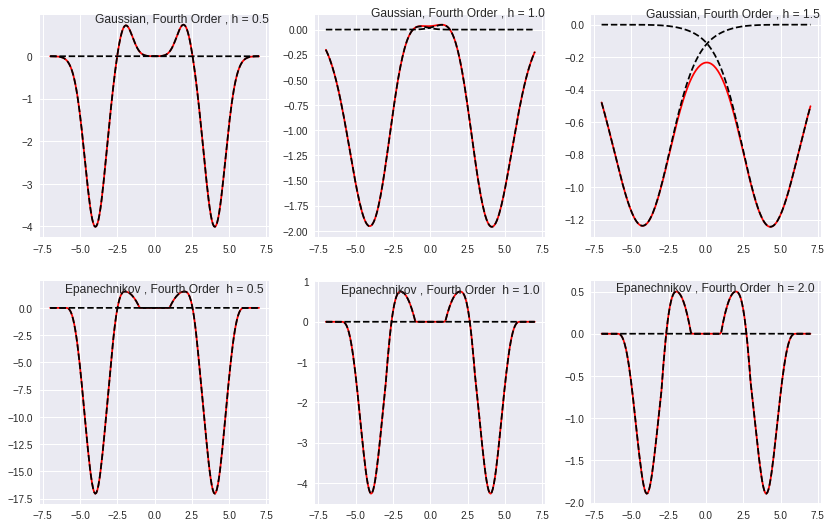

In [30]:
#Let's take any value
X=np.array([-2.0, 2.0])

# Plot all available kernels
X_plot = np.linspace(-7, 7, 200)[:, None]
fig = plt.figure( figsize = (14, 9))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)



x0 = X_plot - X[0]
x1 = X_plot - X[1]

gaus_x0_0_5 = higher_order( 4, x0 , b = 0.5 ,  name ="Gaussian" )
gaus_x1_0_5 = higher_order( 4, x1 , b = 0.5 ,  name ="Gaussian" )


gaus_x0_1 = higher_order( 4, x0 , b = 1 ,  name ="Gaussian" )
gaus_x1_1 = higher_order( 4, x1 , b = 1 ,  name ="Gaussian" )

gaus_x0_1_5 = higher_order( 4, x0 , b = 1.5 ,  name ="Gaussian" )
gaus_x1_1_5 = higher_order( 4, x1 , b = 1.5 ,  name ="Gaussian" )


epane_x0_0_5 = higher_order( 4, x0 , b = 0.5 , name ="Epanechnikov" )
epane_x1_0_5 = higher_order( 4, x1 , b = 0.5 , name ="Epanechnikov" )

epane_x0_1 = higher_order( 4, x0 , b = 1 , name ="Epanechnikov" )
epane_x1_1 = higher_order( 4, x1 , b = 1 , name ="Epanechnikov" )

epane_x0_1_5 = higher_order( 4, x0 , b = 1.5 , name ="Epanechnikov" )
epane_x1_1_5 = higher_order( 4, x1 , b = 1.5 , name ="Epanechnikov" )



ax1.plot( X_plot , (gaus_x0_0_5 +gaus_x1_0_5  )/2 , "r" )
ax1.text( -4 , 0.8, "Gaussian, Fourth Order , h = 0.5 ")
ax1.plot(X_plot, ( gaus_x0_0_5 )/2, '-k', linestyle="dashed")
ax1.plot(X_plot, ( gaus_x1_0_5 )/2, '-k', linestyle="dashed")
ax2.plot( X_plot , (gaus_x0_1 + gaus_x1_1  )/2  , "r" )
ax2.text( -4 , 0.14, "Gaussian, Fourth Order , h = 1.0 ")
ax2.plot(X_plot, ( gaus_x0_1 )/2, '-k', linestyle="dashed")
ax2.plot(X_plot, (gaus_x1_1)/2, '-k', linestyle="dashed")
ax3.plot( X_plot , (gaus_x0_1_5 + gaus_x1_1_5  )/2  , "r" )
ax3.text( -4 , 0.05, "Gaussian, Fourth Order , h = 1.5")
ax3.plot(X_plot, ( gaus_x0_1_5 )/2, '-k', linestyle="dashed")
ax3.plot(X_plot, ( gaus_x1_1_5)/2, '-k', linestyle="dashed")



ax4.plot( X_plot , (epane_x0_0_5 + epane_x1_0_5 ) /2 , "r")
ax4.text( -6 , 1.4 , "Epanechnikov , Fourth Order  h = 0.5  ")
ax4.plot( X_plot , epane_x0_0_5/2 , '-k', linestyle="dashed")
ax4.plot( X_plot , epane_x1_0_5/2 , '-k', linestyle="dashed")
ax5.plot( X_plot , (epane_x0_1 + epane_x1_1 ) /2  , "r")
ax5.text( -6 , 0.7 , "Epanechnikov , Fourth Order  h = 1.0 ")
ax5.plot( X_plot , epane_x0_1 /2   ,'-k', linestyle="dashed")
ax5.plot( X_plot , epane_x1_1 /2 ,'-k', linestyle="dashed")
ax6.plot( X_plot , (epane_x0_1_5 + epane_x1_1_5 ) /2 , "r")
ax6.text( -6 , 0.5 , "Epanechnikov , Fourth Order  h = 2.0  ")
ax6.plot( X_plot , epane_x0_1_5 /2   ,'-k', linestyle="dashed")
ax6.plot( X_plot , epane_x1_1_5 /2  ,'-k', linestyle="dashed")

